In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/bodic/OneDrive/Desktop/2024/data warehouse/daily_data_combined_2010_to_present.csv")
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385033 entries, 0 to 385032
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   city_name                    385033 non-null  object 
 1   datetime                     385033 non-null  object 
 2   weather_code                 385033 non-null  float64
 3   temperature_2m_max           385033 non-null  float64
 4   temperature_2m_min           385033 non-null  float64
 5   temperature_2m_mean          385028 non-null  float64
 6   apparent_temperature_max     385033 non-null  float64
 7   apparent_temperature_min     385033 non-null  float64
 8   apparent_temperature_mean    385028 non-null  float64
 9   sunrise                      385033 non-null  object 
 10  sunset                       385033 non-null  object 
 11  daylight_duration            385033 non-null  float64
 12  sunshine_duration            385028 non-null  float64
 13 

(  city_name    datetime  weather_code  temperature_2m_max  temperature_2m_min  \
 0      Bago  2010-01-01           3.0                30.3                16.0   
 1      Bago  2010-01-02           3.0                30.7                15.8   
 2      Bago  2010-01-03           3.0                30.6                17.3   
 3      Bago  2010-01-04           3.0                30.8                17.4   
 4      Bago  2010-01-05           3.0                31.1                19.3   
 
    temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
 0                 22.4                      31.6                      16.2   
 1                 23.1                      30.7                      15.9   
 2                 23.1                      31.2                      15.6   
 3                 23.6                      31.5                      17.0   
 4                 25.3                      32.9                      20.1   
 
    apparent_temperature_mean 

******CLEANING THE DATA******

In [19]:
rows_with_nulls = data.isnull().any(axis=1).sum()

print(f"Number of rows with null values: {rows_with_nulls}")

Number of rows with null values: 5


In [23]:
df = data.dropna()

rows_removed = len(data) - len(df)
print(f"Number of rows removed: {rows_removed}")

print("Cleaned DataFrame:")
print(df)

Number of rows removed: 5
Cleaned DataFrame:
          city_name    datetime  weather_code  temperature_2m_max  \
0              Bago  2010-01-01           3.0                30.3   
1              Bago  2010-01-02           3.0                30.7   
2              Bago  2010-01-03           3.0                30.6   
3              Bago  2010-01-04           3.0                30.8   
4              Bago  2010-01-05           3.0                31.1   
...             ...         ...           ...                 ...   
385028  Xiangkhoang  2024-11-01          51.0                28.0   
385029  Xiangkhoang  2024-11-02           3.0                25.4   
385030  Xiangkhoang  2024-11-03           3.0                25.2   
385031  Xiangkhoang  2024-11-04          51.0                23.6   
385032  Xiangkhoang  2024-11-05          53.0                20.3   

        temperature_2m_min  temperature_2m_mean  apparent_temperature_max  \
0                     16.0                 22.4  

***CREATING THE RELEVANT GRAPHS FOR DATA INTERPRETATIONS***

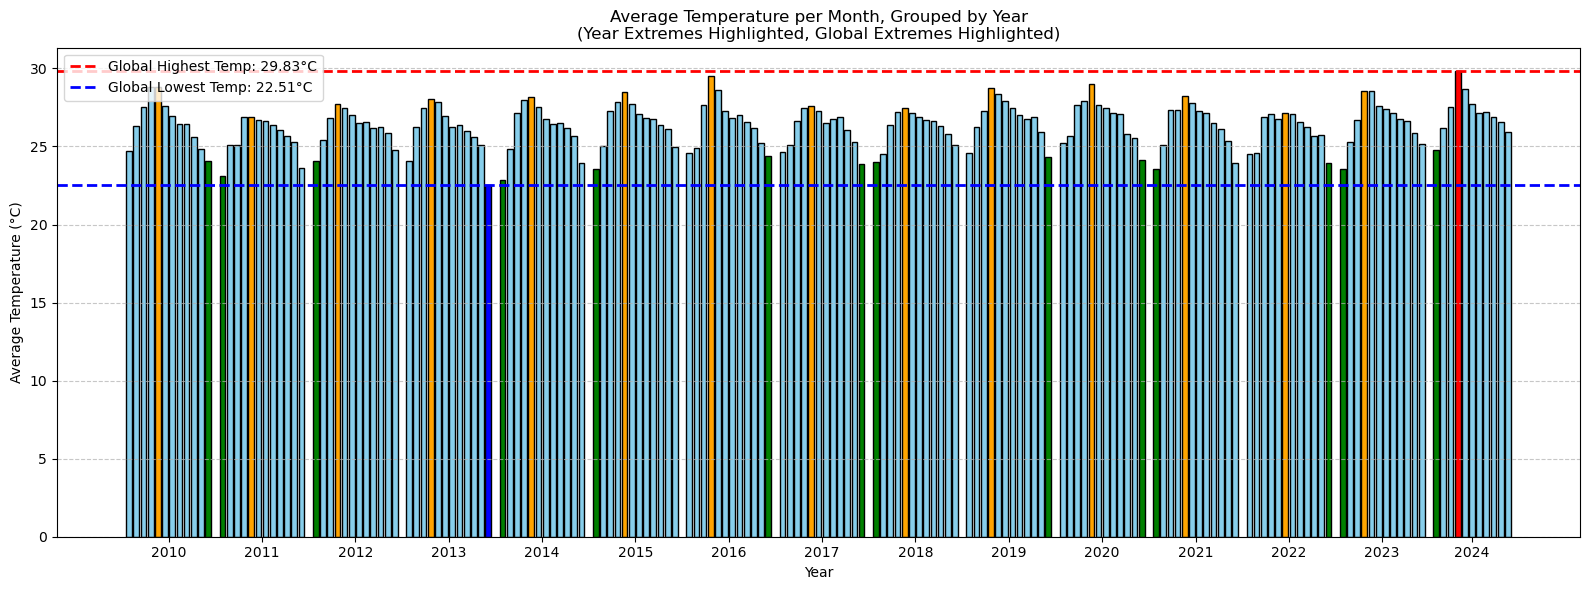

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')

df['year_month'] = df['datetime'].dt.to_period('M')

average_temp_per_month = df.groupby('year_month')['temperature_2m_mean'].mean().reset_index()

average_temp_per_month['year_month'] = average_temp_per_month['year_month'].astype(str)

average_temp_per_month['year'] = pd.to_datetime(average_temp_per_month['year_month']).dt.year

global_max_temp = average_temp_per_month['temperature_2m_mean'].max()
global_min_temp = average_temp_per_month['temperature_2m_mean'].min()

x_positions = []
bar_colors = []

current_x = 0

for year in average_temp_per_month['year'].unique():
    year_data = average_temp_per_month[average_temp_per_month['year'] == year]
    
    year_max_temp = year_data['temperature_2m_mean'].max()
    year_min_temp = year_data['temperature_2m_mean'].min()
    
    for idx in year_data.index:
        x_positions.append(current_x)
        month_temp = average_temp_per_month.loc[idx, 'temperature_2m_mean']
        if month_temp == global_max_temp:
            bar_colors.append('red')  
        elif month_temp == global_min_temp:
            bar_colors.append('blue')  
        elif month_temp == year_max_temp:
            bar_colors.append('orange')  
        elif month_temp == year_min_temp:
            bar_colors.append('green')  
        else:
            bar_colors.append('skyblue')  
        
        current_x += 1 
    
    current_x += 1  

plt.figure(figsize=(16, 6))
plt.bar(
    x_positions, 
    average_temp_per_month['temperature_2m_mean'], 
    color=bar_colors, 
    edgecolor='black'
)

plt.axhline(y=global_max_temp, color='red', linestyle='--', linewidth=2, label=f'Global Highest Temp: {global_max_temp:.2f}°C')
plt.axhline(y=global_min_temp, color='blue', linestyle='--', linewidth=2, label=f'Global Lowest Temp: {global_min_temp:.2f}°C')

unique_years = average_temp_per_month['year'].unique()
year_positions = [
    np.mean([x_positions[i] for i in range(len(x_positions)) if average_temp_per_month['year'].iloc[i] == year])
    for year in unique_years
]

plt.xticks(ticks=year_positions, labels=unique_years, rotation=0)

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature per Month, Grouped by Year\n(Year Extremes Highlighted, Global Extremes Highlighted)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.legend(loc='upper left')

plt.show()

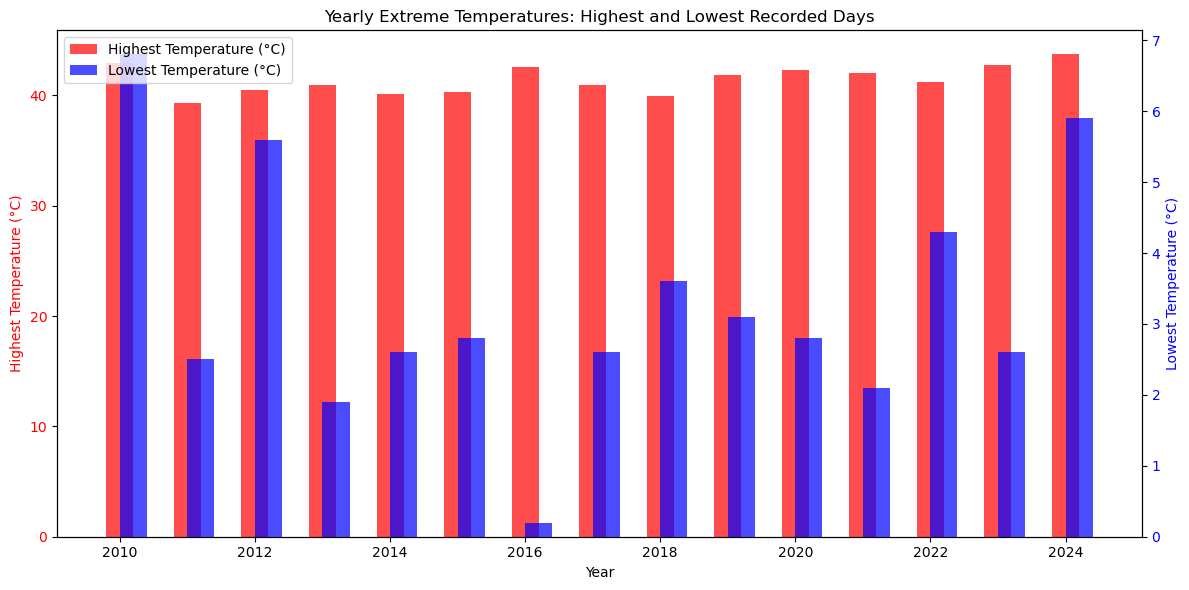

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

highest_temp_per_year = df.loc[df.groupby('year')['temperature_2m_max'].idxmax()]
lowest_temp_per_year = df.loc[df.groupby('year')['temperature_2m_min'].idxmin()]

years = highest_temp_per_year['year']
highest_temps = highest_temp_per_year['temperature_2m_max']
lowest_temps = lowest_temp_per_year['temperature_2m_min']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(years, highest_temps, color='red', label='Highest Temperature (°C)', alpha=0.7, width=0.4, align='center')
ax1.set_xlabel('Year')
ax1.set_ylabel('Highest Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.bar(years, lowest_temps, color='blue', label='Lowest Temperature (°C)', alpha=0.7, width=0.4, align='edge')
ax2.set_ylabel('Lowest Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Yearly Extreme Temperatures: Highest and Lowest Recorded Days')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

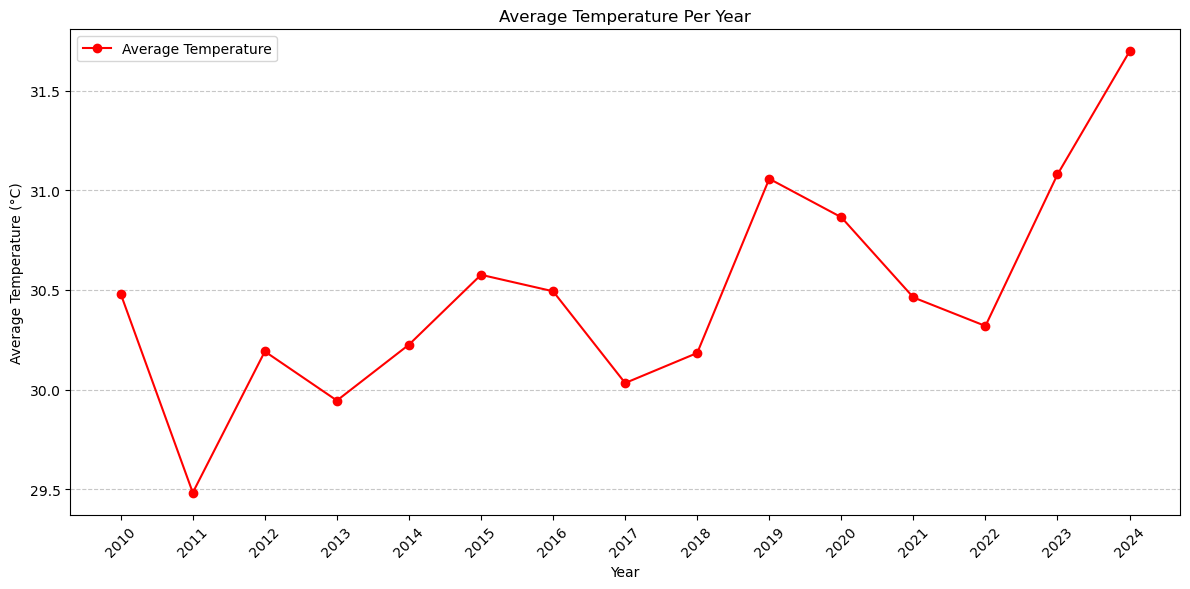

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')

df['year'] = df['datetime'].dt.year

yearly_avg_temp = df.groupby('year')['temperature_2m_max'].mean().reset_index()

years = yearly_avg_temp['year']
avg_temps = yearly_avg_temp['temperature_2m_max']

plt.figure(figsize=(12, 6))
plt.plot(years, avg_temps, marker='o', linestyle='-', color='red', label='Average Temperature')

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Per Year')
plt.xticks(years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

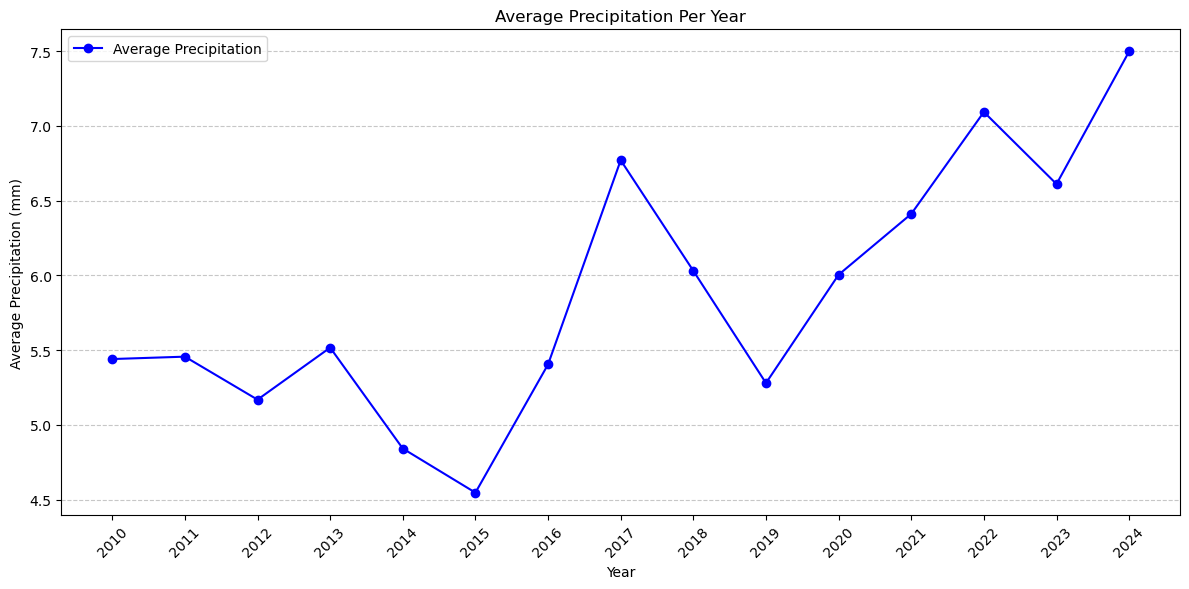

In [7]:
yearly_avg_precip = df.groupby('year')['precipitation_sum'].mean().reset_index()

years = yearly_avg_precip['year']
avg_precip = yearly_avg_precip['precipitation_sum']

plt.figure(figsize=(12, 6))
plt.plot(years, avg_precip, marker='o', linestyle='-', color='blue', label='Average Precipitation')

plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Precipitation Per Year')
plt.xticks(years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

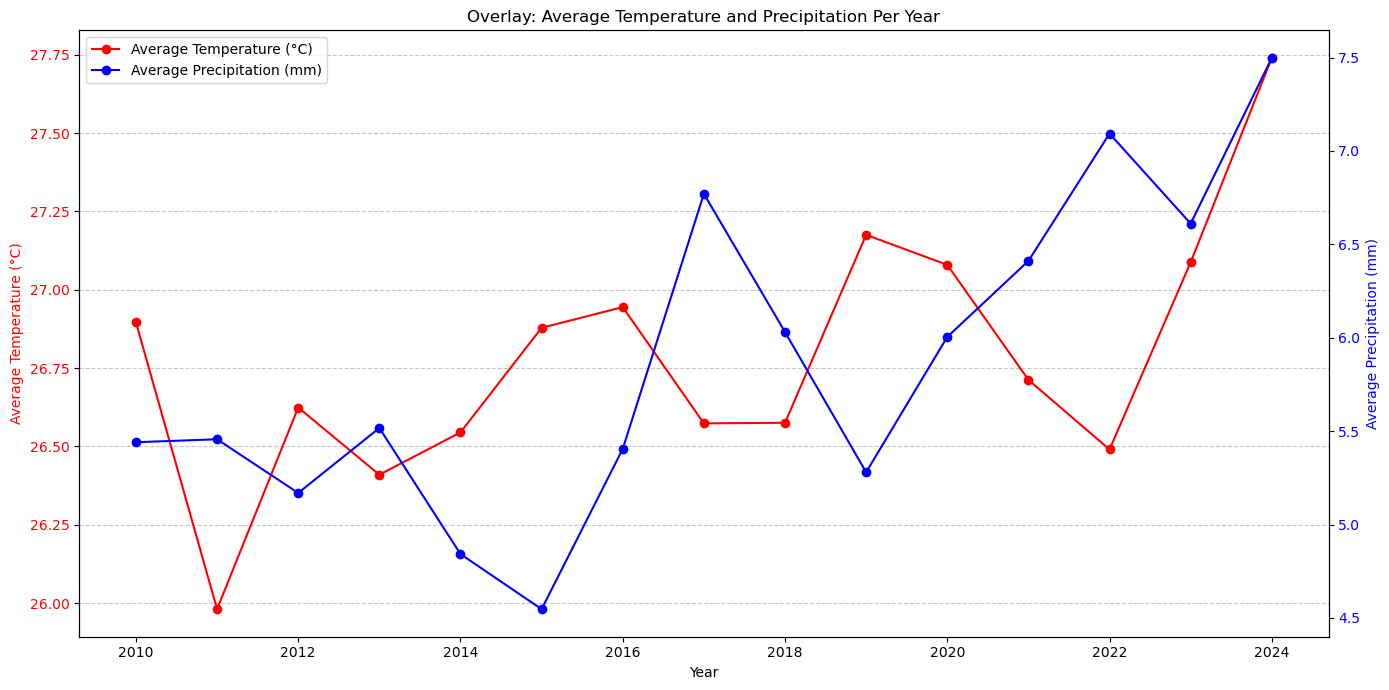

In [9]:
yearly_avg_temp = df.groupby('year')[['temperature_2m_max', 'temperature_2m_min']].mean().reset_index()
yearly_avg_temp['average_temperature'] = (yearly_avg_temp['temperature_2m_max'] + yearly_avg_temp['temperature_2m_min']) / 2
yearly_avg_precip = df.groupby('year')['precipitation_sum'].mean().reset_index()

years = yearly_avg_temp['year']
avg_temp = yearly_avg_temp['average_temperature']
avg_precip = yearly_avg_precip['precipitation_sum']

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(years, avg_temp, marker='o', linestyle='-', color='red', label='Average Temperature (°C)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(years, avg_precip, marker='o', linestyle='-', color='blue', label='Average Precipitation (mm)')
ax2.set_ylabel('Average Precipitation (mm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Overlay: Average Temperature and Precipitation Per Year')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()